# 🧠 What is Neural Style Transfer?
Neural Style Transfer (NST) is a technique that applies the artistic style of one image (like Van Gogh's painting) to the content of another image (like your photo). It uses deep learning, particularly a pre-trained convolutional neural network (CNN) like VGG19.

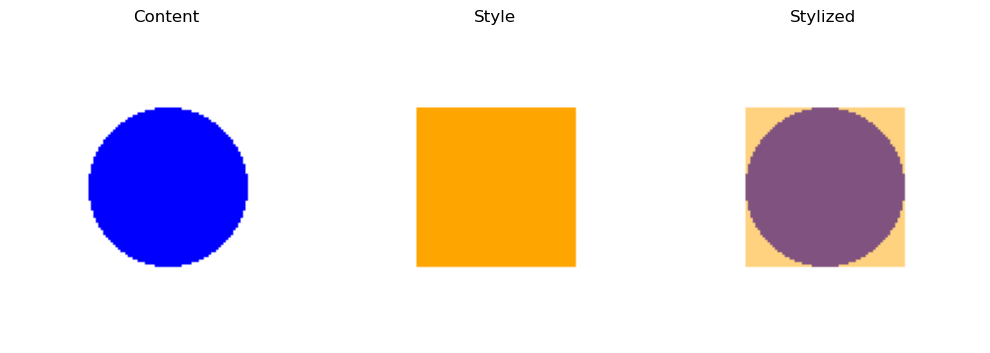

In [1]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Create content and style images
def create_shape_image(shape="circle", color="blue", size=(128, 128)):
    img = Image.new("RGB", size, "white")
    draw = ImageDraw.Draw(img)
    if shape == "circle":
        draw.ellipse([32, 32, 96, 96], fill=color)
    elif shape == "square":
        draw.rectangle([32, 32, 96, 96], fill=color)
    return img

# Fake stylization: blend style and content images
def fake_style_transfer(content_img, style_img, alpha=0.5):
    content_array = np.array(content_img).astype(np.float32)
    style_array = np.array(style_img).astype(np.float32)
    result_array = (1 - alpha) * content_array + alpha * style_array
    result_img = Image.fromarray(np.uint8(result_array))
    return result_img

# Generate synthetic images
content_img = create_shape_image("circle", "blue")
style_img = create_shape_image("square", "orange")
stylized_img = fake_style_transfer(content_img, style_img, alpha=0.5)

# Display images
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
for ax, img, title in zip(axs, [content_img, style_img, stylized_img], ["Content", "Style", "Stylized"]):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")
plt.tight_layout()
plt.show()
